In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir

#music imports
from music21 import converter, key
import pretty_midi
# folder
data_dir = './data/'

## METADATA about the dataset
Summary: lots of beethoven, most common instrument is solo piano but there is also string, and woodwind instruments.

In [23]:
# data
metadata_df = pd.read_csv(data_dir+"musicnet_metadata.csv")
print("number of data entries", len(metadata_df))
# print("features", metadata_df.columns.to_list())
metadata_df.head()

number of data entries 330


,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


<Axes: ylabel='ensemble'>

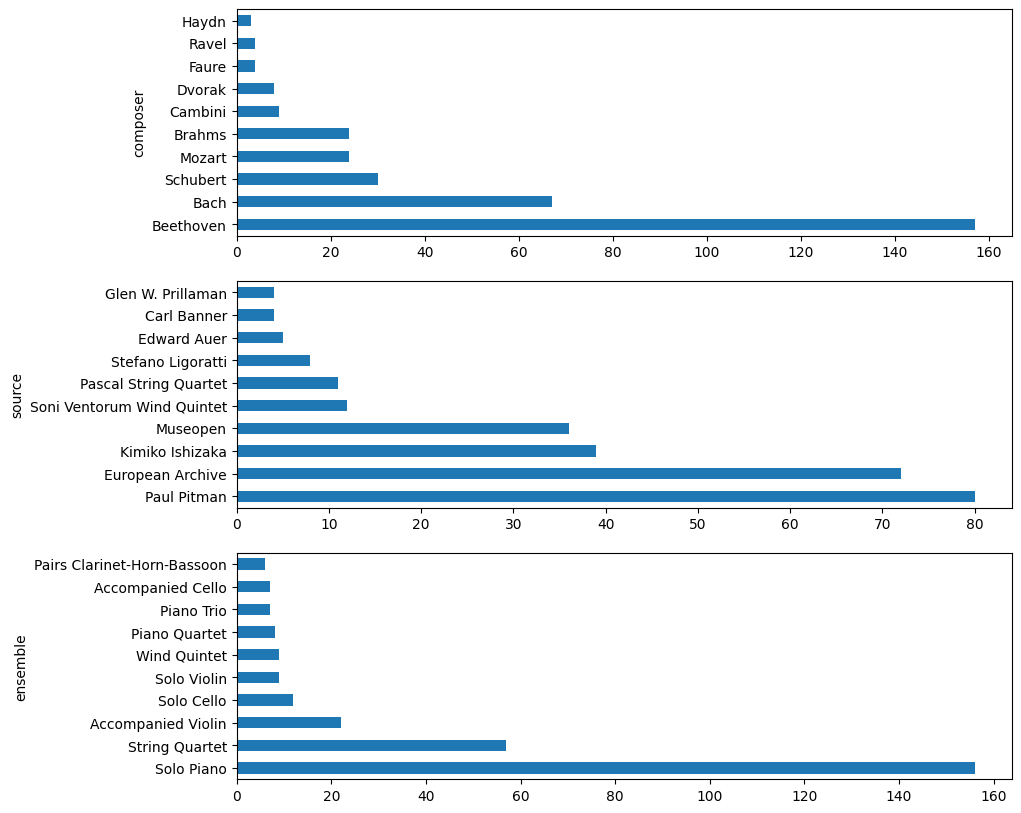

In [24]:
#plot all of these in one figure
fig, axs = plt.subplots(3,1, figsize=(10, 10))
metadata_df['composer'].value_counts().head(10).plot(kind='barh', ax=axs[0])
metadata_df['source'].value_counts().head(10).plot(kind='barh', ax=axs[1])
metadata_df['ensemble'].value_counts().head(10).plot(kind='barh', ax=axs[2])

## Understanding the data (.mid files)

In [36]:
#save the different values
composer_names = metadata_df['composer'].unique()
composer_files = {}
for composer_name in composer_names:
    composer_dir = data_dir+"musicnet_midis/musicnet_midis/"+composer_name
    composer_files[composer_name] = [composer_dir+"/"+fname for fname in listdir(composer_dir)]

print(composer_files)
print(composer_names)

{'Schubert': ['./data/musicnet_midis/musicnet_midis/Schubert/1775_sy_sps21.mid', './data/musicnet_midis/musicnet_midis/Schubert/1757_d958-1.mid', './data/musicnet_midis/musicnet_midis/Schubert/1752_sy_sps14.mid', './data/musicnet_midis/musicnet_midis/Schubert/1760_d958-4.mid', './data/musicnet_midis/musicnet_midis/Schubert/1727_schubert_op114_2.mid', './data/musicnet_midis/musicnet_midis/Schubert/1730_schubert_op114_5.mid', './data/musicnet_midis/musicnet_midis/Schubert/1728_schubert_op114_3.mid', './data/musicnet_midis/musicnet_midis/Schubert/1772_sy_sps42.mid', './data/musicnet_midis/musicnet_midis/Schubert/1766_scbt1424.mid', './data/musicnet_midis/musicnet_midis/Schubert/1734_sy_sps93.mid', './data/musicnet_midis/musicnet_midis/Schubert/1729_schubert_op114_4.mid', './data/musicnet_midis/musicnet_midis/Schubert/1735_sy_sps94.mid', './data/musicnet_midis/musicnet_midis/Schubert/1733_sy_sps92.mid', './data/musicnet_midis/musicnet_midis/Schubert/1758_d958-2.mid', './data/musicnet_midis

Tempo (BPM): [ 0.         30.         31.090909   32.937063   36.687063   37.777972
 39.569016   43.319016   44.33719773 46.1086266  46.5563876  47.0251376
 47.5705921  48.3705921  48.7552076  51.7552076  52.6123506  53.0738891
 53.5738891  54.4969661  55.2661971  60.1411971  60.5258126  60.9205496
 61.3259551  61.7545266  61.96664783 62.22471237 62.44693457 62.74693457]
Instrument: , Program: 0, Drum: False
Instrument: , Program: 0, Drum: False
Total duration (seconds): 64.37193456666667
Estimated Key: B- major


/var/folders/ns/rykfnvcd2m5290k7kpxhz2_m0000gn/T/ipykernel_31537/1890270044.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


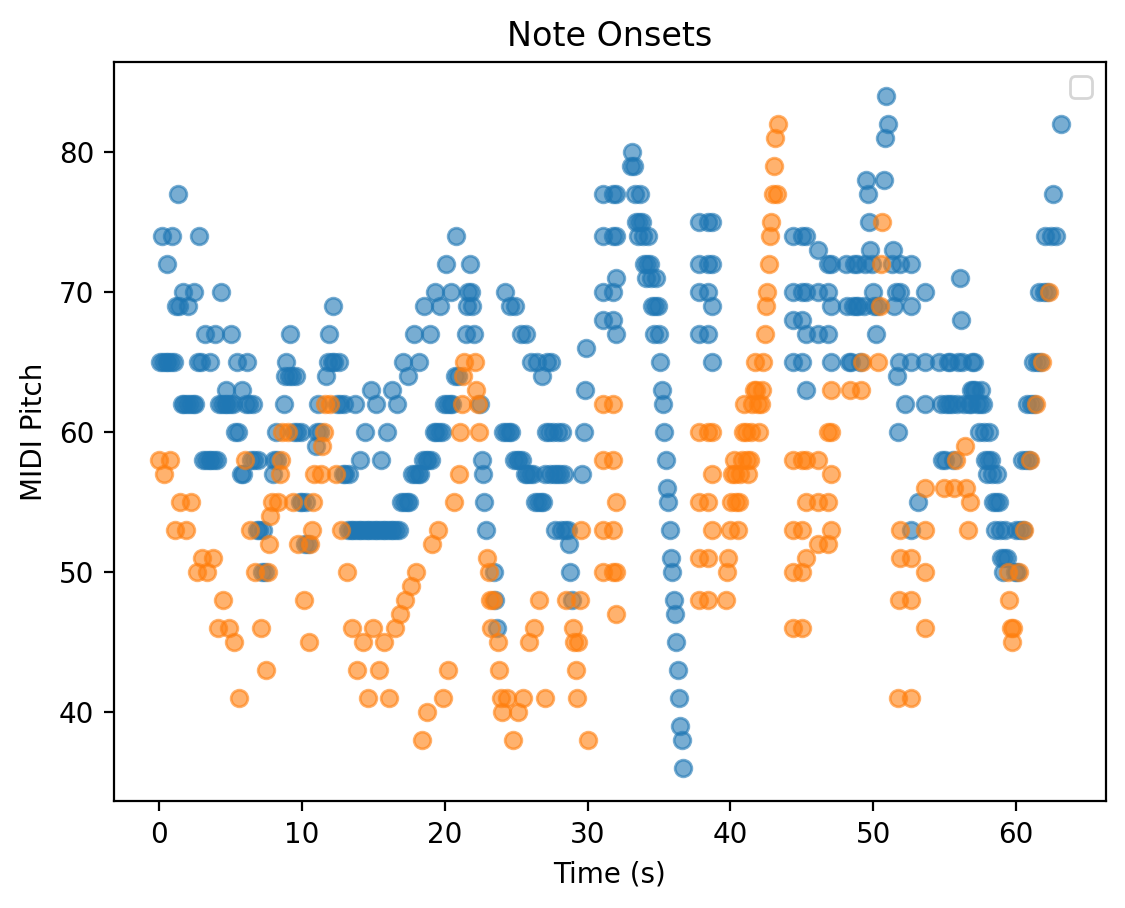

In [ ]:
#preview the .mid data in a given filename
test_file = composer_files['Bach'][0]


# Load MIDI file
midi_data = pretty_midi.PrettyMIDI(test_file)

# Get tempo(s)
tempo, beat_times = midi_data.get_tempo_changes()
print("Tempo (BPM):", tempo)

# Instruments
for instrument in midi_data.instruments:
    print(f"Instrument: {instrument.name}, Program: {instrument.program}, Drum: {instrument.is_drum}")
    # for note in instrument.notes[:10]:  # Print first 10 notes
    #     print(f"Note: {note.pitch}, Start: {note.start:.2f}, End: {note.end:.2f}, Velocity: {note.velocity}")

# Duration
print("Total duration (seconds):", midi_data.get_end_time())

# Key analysis with music21 (optional)


score = converter.parse(test_file)
k = score.analyze('key')
print("Estimated Key:", k)

for instrument in midi_data.instruments:
    start_times = [note.start for note in instrument.notes]
    pitches = [note.pitch for note in instrument.notes]
    plt.scatter(start_times, pitches, alpha=0.6, label=instrument.name)

plt.xlabel("Time (s)")
plt.ylabel("MIDI Pitch")
plt.title("Note Onsets")
plt.legend()
plt.show()




## METADATA about the dataset
Summary: lots of beethoven, most common instrument is solo piano but there is also string, and woodwind instruments.